# **Homework #5: Deep Learning - Review**

---
### **Description**
In this notebook, you will work on a project using Deep Learning to hone your understanding of the Deep Learning fundamentals.

<br>

### **Structure**
**Part 1**: [Analysis of Mineral Hardness](#p1)

> **Part 1.1**: [The Initial Attempt](#p1.1)

> **Part 1.2**: [Improvements](#p1.2)


<br>



### **Learning Objectives**
By the end of this notebook, you will have trained, implemented, evaluated, and fine tuned both deep learning regression and classification models.

<br>


### **Cheat Sheets**
* [Deep Learning with pytorch](https://docs.google.com/document/d/1Wm01maZUrSuwdOhuI05uZBtqt5nL5shOGnJ7kTHWl_I/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
from keras.models import Sequential
from keras.layers import *
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image

from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

<a name="p1"></a>

---
## **Part 1: Analysis of Mineral Hardness**
---

Determining the hardness of minerals is vital for designing materials that may use them. In this section, you will build a regression model to predict the hardness of minerals based on their atomic properties.


<a name="p1.1"></a>

---
### **Part 1.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**

**Run the code below to import and split the data.**

In [ ]:
mineral_df = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/material%20Mohs%20hardness/Mineral_Dataset.csv').drop(columns = 'Unnamed: 0')
mineral_df.head()

X = mineral_df.drop('Hardness', axis = 1)
y = mineral_df['Hardness']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Step #2: Determine the dimensions of the data**


**Determine the number of input neurons and if the data needs to be flattened.**

###### **Solution**


In [ ]:
X_train.shape

(497, 11)

#### **Steps #3 - 6: Build the Model**


Build a model sequentially such that there is:

* The Input Layer, flattened if necessary, and correctly sized for receiving inputs.
* No Hidden Layers
* The Output Layer with the correct number of neurons such that we are predicting a continuous number.

In [ ]:
# Define the neural network architecture


###### **Solution**

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Input(11))
model.add(Dense(1))

#### **Step #7: Fit the model**

* Use a learning rate of 0.1.
* Use `mse` for both the loss function and evaluation metric.
* Train using 5 epochs and a batch size of 16.


##### **Solution**

In [ ]:
# Compile the model
opt = Adam(learning_rate = 0.1)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=5, batch_size = 16)

Epoch 1/5
28/28 [==============================] - 1s 8ms/step - loss: 3224.2344 - mse: 3224.2344 - val_loss: 866.2483 - val_mse: 866.2483
Epoch 2/5
28/28 [==============================] - 0s 4ms/step - loss: 22009.5859 - mse: 22009.5859 - val_loss: 3419.3105 - val_mse: 3419.3105
Epoch 3/5
28/28 [==============================] - 0s 3ms/step - loss: 4962.0601 - mse: 4962.0601 - val_loss: 901.2156 - val_mse: 901.2156
Epoch 4/5
28/28 [==============================] - 0s 3ms/step - loss: 20188.6680 - mse: 20188.6680 - val_loss: 1421.6017 - val_mse: 1421.6017
Epoch 5/5
28/28 [==============================] - 0s 3ms/step - loss: 1712.2714 - mse: 1712.2714 - val_loss: 456.3835 - val_mse: 456.3835


#### **Step #8: Evaluate the model**


In [ ]:
print('MSE: ' + str(model.evaluate(X_test, y_test)))

4/4 [==============================] - 0s 4ms/step - loss: 459.8949 - mse: 459.8949
MSE: [459.8949279785156, 459.8949279785156]


#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for items in the validation set.

4/4 [==============================] - 0s 4ms/step


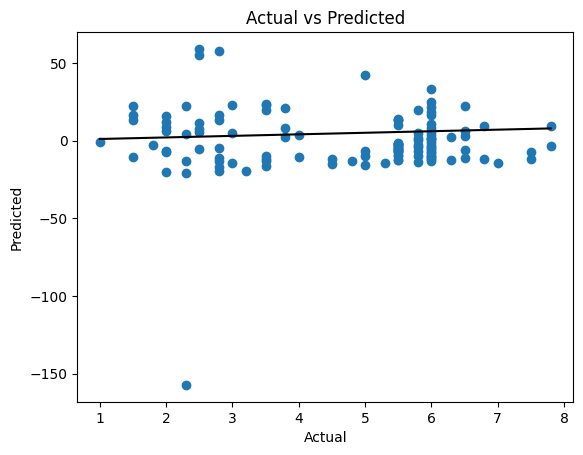

In [ ]:
# Visualize comparison of predictions vs. actual values
pred = model.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

<a name="p1.2"></a>

---
### **Part 1.2: Improvements**
---


Using the template cell provided below, create and train a neural network that is capable of achieving an 85% or higher accuracy on the test dataset for classifying the people.

**Hint:** The first step to improving your work above is adding at least one Hidden Layer. However, you can also consider:
* Changing the number of neurons in each Hidden Layer
* Changing the activation functions in the Hidden Layers
* Changing the activation function in the Output Layer
* Training with a different optimizer
* Training with a different learning rate
* Changing the number of training epochs

In [ ]:
# BUILD
#=======
# Define the neural network architecture




# FIT
#=====





# EVALUATE
#==========
print('MSE: ' + str(model.evaluate(X_test, y_test)))

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

#### **Solution**

In [ ]:
# BUILD
#=======
# Define the neural network architecture
model = Sequential()
model.add(Input(11))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))



# FIT
#=====
# Compile the model
opt = Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=5, batch_size = 16)


# EVALUATE
#==========
print('MSE: ' + str(model.evaluate(X_test, y_test)))

Epoch 1/5
28/28 [==============================] - 2s 10ms/step - loss: 24.2431 - mse: 24.2431 - val_loss: 24.1288 - val_mse: 24.1288
Epoch 2/5
28/28 [==============================] - 0s 4ms/step - loss: 24.2431 - mse: 24.2431 - val_loss: 24.1288 - val_mse: 24.1288
Epoch 3/5
28/28 [==============================] - 0s 5ms/step - loss: 24.2431 - mse: 24.2431 - val_loss: 24.1288 - val_mse: 24.1288
Epoch 4/5
28/28 [==============================] - 0s 5ms/step - loss: 24.2431 - mse: 24.2431 - val_loss: 24.1288 - val_mse: 24.1288
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 24.4512 - mse: 24.4512
MSE: [24.451200485229492, 24.451200485229492]


4/4 [==============================] - 0s 3ms/step


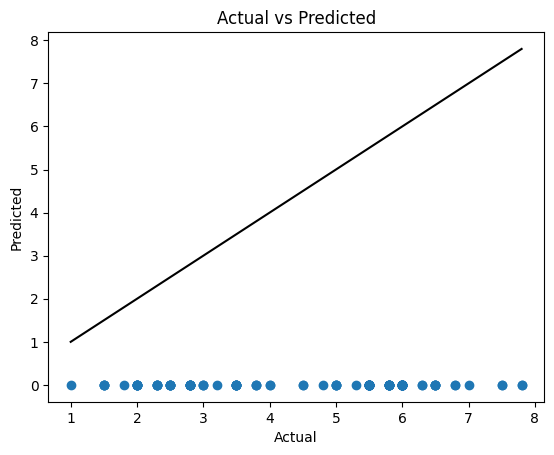

In [ ]:
# Visualize comparison of predictions vs. actual values
pred = model.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

# End of notebook
---

© 2024 The Coding School, All rights reserved